In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/sreya/Downloads/healthcare-dataset-stroke-data.csv')

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [7]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [8]:
df['gender'] = df['gender'].replace('Other', 'Male')
print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [9]:
df['gender'].value_counts()

Female    2994
Male      2116
Name: gender, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [12]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.7    37
26.1    37
        ..
13.9     1
49.9     1
40.6     1
52.3     1
44.1     1
Name: bmi, Length: 418, dtype: int64

In [14]:
df_mean_imputed = df.copy()
df_mean_imputed['bmi'].fillna(df['bmi'].mean(), inplace=True)
df_mean_imputed

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [15]:
df_mean_imputed.duplicated().value_counts()

False    5110
dtype: int64

In [16]:
df_mean_imputed['gender'] = df_mean_imputed['gender'].map({'Male':0, 'Female':1})
df_mean_imputed['ever_married'] = df_mean_imputed['ever_married'].map({'No':0, 'Yes':1})
df_mean_imputed['Residence_type'] = df_mean_imputed['Residence_type'].map({'Rural':0, 'Urban':1})
print(df_mean_imputed['gender'].head())

0    0
1    1
2    0
3    1
4    1
Name: gender, dtype: int64


In [17]:
print(df_mean_imputed['ever_married'].head())

0    1
1    1
2    1
3    1
4    1
Name: ever_married, dtype: int64


In [18]:
print(df_mean_imputed['Residence_type'].head())

0    1
1    0
2    0
3    1
4    0
Name: Residence_type, dtype: int64


In [19]:
print(df_mean_imputed['gender'].head())

0    0
1    1
2    0
3    1
4    1
Name: gender, dtype: int64


In [20]:
df_mean_imputed

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,51676,1,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,31112,0,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,60182,1,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,1665,1,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,Private,1,83.75,28.893237,never smoked,0
5106,44873,1,81.0,0,0,1,Self-employed,1,125.20,40.000000,never smoked,0
5107,19723,1,35.0,0,0,1,Self-employed,0,82.99,30.600000,never smoked,0
5108,37544,0,51.0,0,0,1,Private,0,166.29,25.600000,formerly smoked,0


In [21]:
df_mean_imputed['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [22]:
df_mean_imputed['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

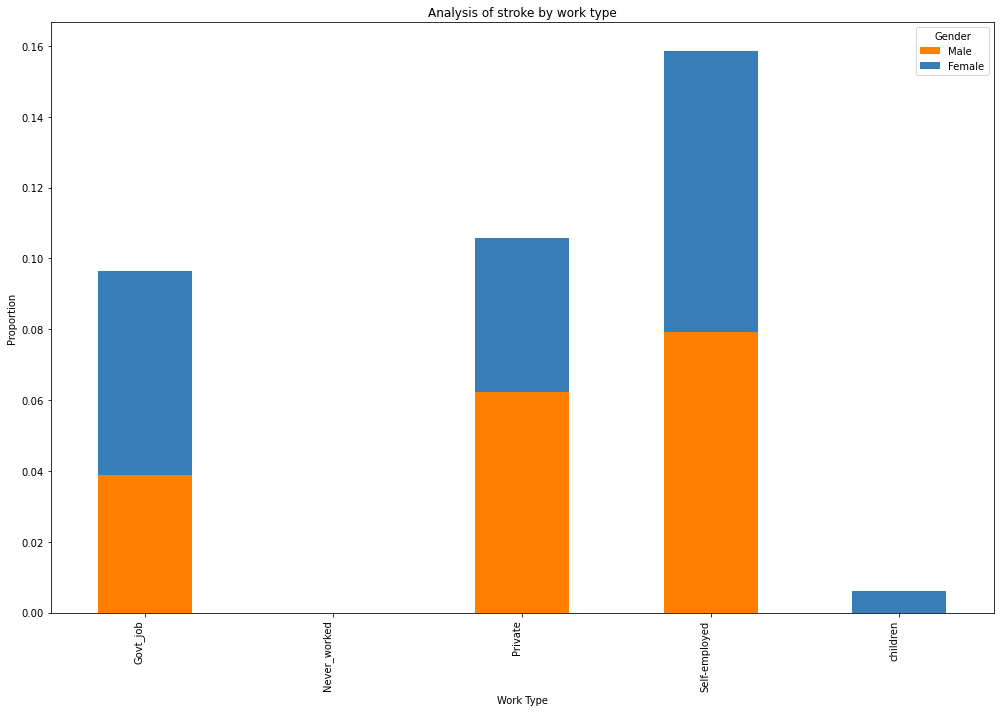

In [23]:
stroke_by_work_type = df_mean_imputed.groupby(['work_type', 'gender'])['stroke'].mean().unstack()
fig, ax = plt.subplots(figsize=(14, 10))
stroke_by_work_type.plot(kind='bar', stacked=True, color=['#ff7f00', '#377eb8'], ax=ax)
plt.title('Analysis of stroke by work type')
plt.xlabel('Work Type')
plt.ylabel('Proportion')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.tight_layout()
plt.show()

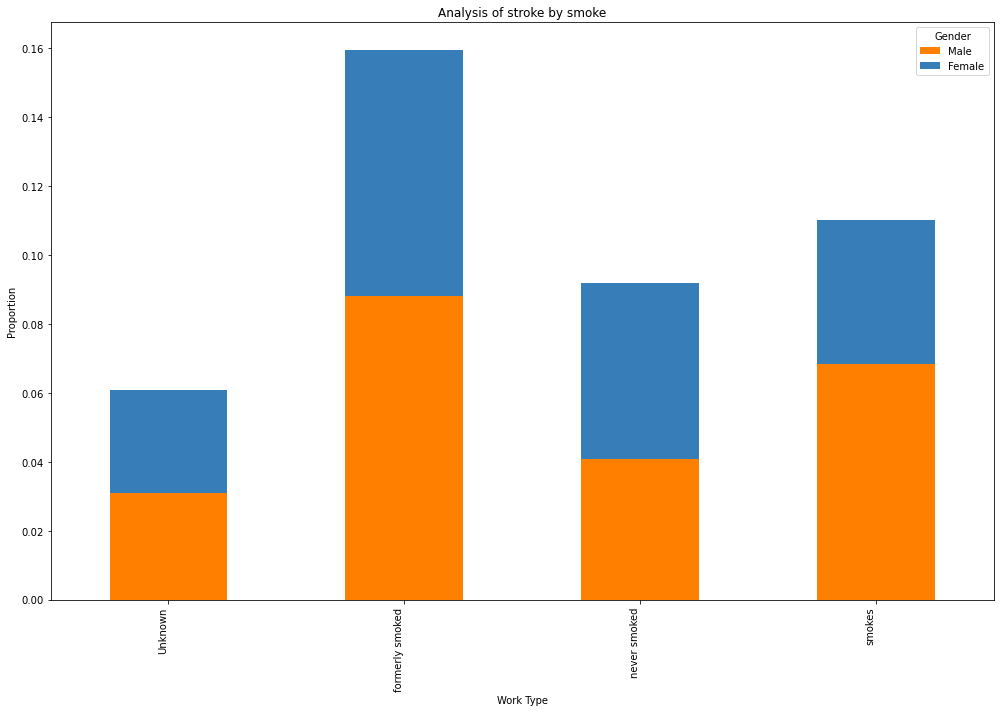

In [24]:
stroke_by_smoking_status = df_mean_imputed.groupby(['smoking_status', 'gender'])['stroke'].mean().unstack()
fig, ax = plt.subplots(figsize=(14, 10))
stroke_by_smoking_status.plot(kind='bar', stacked=True, color=['#ff7f00', '#377eb8'], ax=ax)
plt.title('Analysis of stroke by smoke')
plt.xlabel('Work Type')
plt.ylabel('Proportion')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.tight_layout()
plt.show()

C:\Users\sreya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

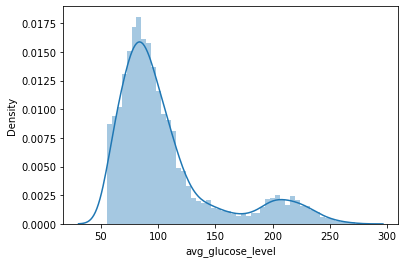

In [25]:
sns.distplot(df_mean_imputed['avg_glucose_level'])

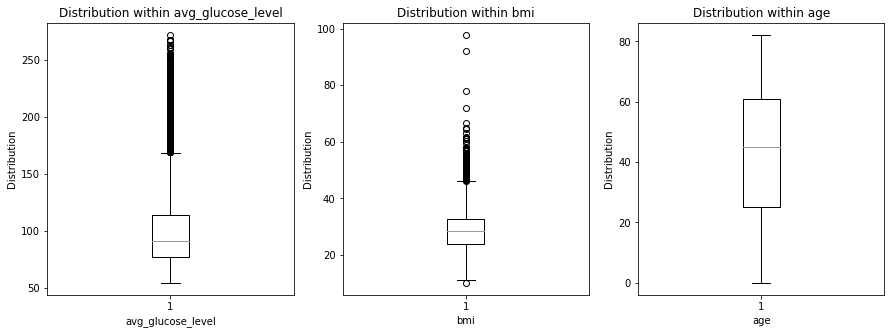

In [26]:
num_cols = ['avg_glucose_level', 'bmi', 'age']

fig, ax = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(15,5))
for i, feature in enumerate(num_cols):
    ax[i].boxplot(df_mean_imputed[feature])
    ax[i].set_xlabel(feature)
    ax[i].set_title("Distribution within " + feature)
    ax[i].set_ylabel("Distribution")
plt.show()

In [27]:
def outlier_replacement(column):
    Q1 = df_mean_imputed[column].quantile(0.25)
    Q2 = df_mean_imputed[column].quantile(0.50)
    Q3 = df_mean_imputed[column].quantile(0.75)
    IQR = Q3-Q1
    df_mean_imputed[column] = np.where(df_mean_imputed[column]> (Q3 + 1.5 * IQR), Q2, df_mean_imputed[column])
    df_mean_imputed[column] = np.where(df_mean_imputed[column]< (Q1 -1.5 *IQR), Q2, df_mean_imputed[column])

outlier_replacement("avg_glucose_level")
outlier_replacement("bmi")

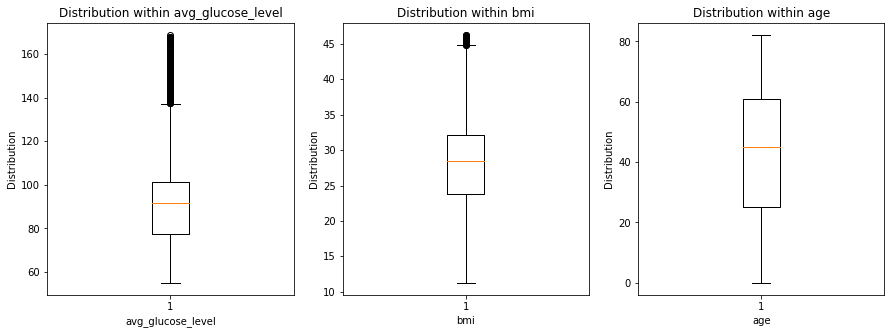

In [28]:
num_cols = ['avg_glucose_level', 'bmi', 'age']

fig, ax = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(15,5))
for i, feature in enumerate(num_cols):
    ax[i].boxplot(df_mean_imputed[feature])
    ax[i].set_xlabel(feature)
    ax[i].set_title("Distribution within " + feature)
    ax[i].set_ylabel("Distribution")
plt.show()

In [29]:
import statistics as stats
def get_aggregates(column):
    price_avg = np.mean(df_mean_imputed[column])
    price_std = np.std(df_mean_imputed[column])
    unique_count = len(df_mean_imputed[column].unique())
    print("\n - " + column + ":")
    print("Mean: ", price_avg)
    print("Median: ", np.median(df_mean_imputed[column]))
    print("Mode: ", stats.mode(df_mean_imputed[column]))
    print("Standard Deviation: ", price_std)
    print("Unique values: " + str(unique_count))

for column in num_cols:
    get_aggregates(column)


 - avg_glucose_level:
Mean:  91.4902827788654
Median:  91.8825
Mode:  91.88499999999999
Standard Deviation:  21.199378941104083
Unique values: 3375

 - bmi:
Mean:  28.287287792420916
Median:  28.4
Mode:  28.893236911794673
Standard Deviation:  6.547704399859996
Unique values: 334

 - age:
Mean:  43.226614481409015
Median:  45.0
Mode:  78.0
Standard Deviation:  22.61043402711301
Unique values: 104


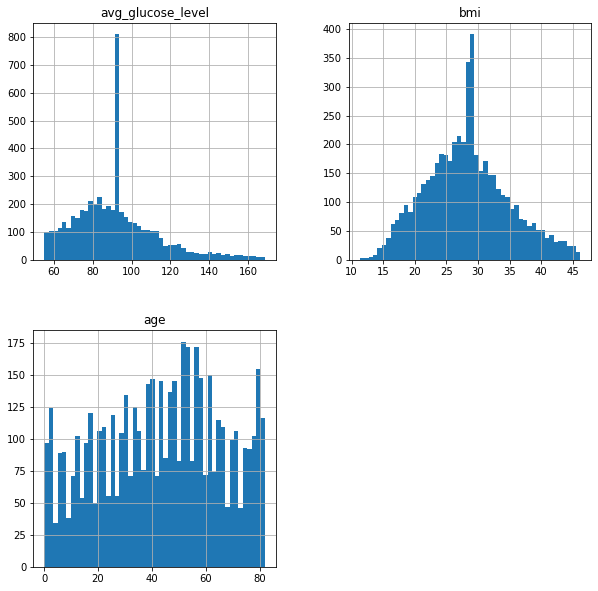

In [30]:
df_mean_imputed[num_cols].hist(bins=50, figsize=(10, 10))
plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['work_type', 'smoking_status']
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df_mean_imputed[col] = le.fit_transform(df_mean_imputed[col])
    label_encoders[col] = le

In [32]:
df_mean_imputed

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,2,1,91.885,36.600000,1,1
1,51676,1,61.0,0,0,1,3,0,91.885,28.893237,2,1
2,31112,0,80.0,0,1,1,2,0,105.920,32.500000,2,1
3,60182,1,49.0,0,0,1,2,1,91.885,34.400000,3,1
4,1665,1,79.0,1,0,1,3,0,91.885,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,2,1,83.750,28.893237,2,0
5106,44873,1,81.0,0,0,1,3,1,125.200,40.000000,2,0
5107,19723,1,35.0,0,0,1,3,0,82.990,30.600000,2,0
5108,37544,0,51.0,0,0,1,2,0,166.290,25.600000,1,0


In [33]:
from sklearn.preprocessing import MinMaxScaler
features_to_standardize = ['age', 'avg_glucose_level', 'bmi']
scaler = MinMaxScaler()
df_mean_imputed[features_to_standardize] = scaler.fit_transform(df_mean_imputed[features_to_standardize])
df_mean_imputed

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,0.816895,0,1,1,2,1,0.323750,0.724928,1,1
1,51676,1,0.743652,0,0,1,3,0,0.323750,0.504104,2,1
2,31112,0,0.975586,0,1,1,2,0,0.447341,0.607450,2,1
3,60182,1,0.597168,0,0,1,2,1,0.323750,0.661891,3,1
4,1665,1,0.963379,1,0,1,3,0,0.323750,0.363897,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,0.975586,1,0,1,2,1,0.252113,0.504104,2,0
5106,44873,1,0.987793,0,0,1,3,1,0.617119,0.822350,2,0
5107,19723,1,0.426270,0,0,1,3,0,0.245421,0.553009,2,0
5108,37544,0,0.621582,0,0,1,2,0,0.978954,0.409742,1,0


In [34]:
df_mean_imputed.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [35]:
df_mean_imputed['gender'].value_counts()

1    2994
0    2116
Name: gender, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [37]:
#X = df_mean_imputed[['age', 'avg_glucose_level', 'bmi', 'smoking_status', 'work_type', 'Residence_type']].values
X = df_mean_imputed.drop('stroke', axis=1)
y = df_mean_imputed['stroke']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 20)

In [39]:
logreg = LogisticRegression()
logreg

LogisticRegression()

In [40]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [41]:
X_train_prediction = logreg.predict(X_train)
X_train_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
X_test_prediction = logreg.predict(X_test)
X_test_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [44]:
print('Accuracy_score:', training_data_accuracy)

Accuracy_score: 0.9527886497064579


In [45]:
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy_score:', test_data_accuracy)

Accuracy_score: 0.9452054794520548


In [46]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [47]:
cr = classification_report(y_test, X_test_prediction)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       0.00      0.00      0.00        56

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.89      0.95      0.92      1022



C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
cr = classification_report(y_train, X_train_prediction)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      3895
           1       0.00      0.00      0.00       193

    accuracy                           0.95      4088
   macro avg       0.48      0.50      0.49      4088
weighted avg       0.91      0.95      0.93      4088



C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86       966
           1       0.11      0.46      0.18        56

    accuracy                           0.77      1022
   macro avg       0.54      0.62      0.52      1022
weighted avg       0.92      0.77      0.83      1022



In [50]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_train_rus, y_train_rus)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.64      0.78       966
           1       0.12      0.82      0.21        56

    accuracy                           0.65      1022
   macro avg       0.55      0.73      0.49      1022
weighted avg       0.94      0.65      0.75      1022



In [51]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_train_ros, y_train_ros)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.47      0.63       966
           1       0.07      0.70      0.13        56

    accuracy                           0.48      1022
   macro avg       0.52      0.58      0.38      1022
weighted avg       0.91      0.48      0.60      1022



In [52]:
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize ADASYN
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Train the model
model = LogisticRegression()
model.fit(X_train_adasyn, y_train_adasyn)

# Make predictions
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.71      0.82       966
           1       0.12      0.68      0.21        56

    accuracy                           0.71      1022
   macro avg       0.55      0.70      0.51      1022
weighted avg       0.93      0.71      0.79      1022



In [53]:
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report

# Initialize ADASYN
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Initialize the Logistic Regression model
model = LogisticRegression()

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')

# Train the model with cross-validation and hyperparameter tuning
grid_search.fit(X_train_adasyn, y_train_adasyn)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


              precision    recall  f1-score   support

           0       0.98      0.80      0.88       966
           1       0.17      0.71      0.28        56

    accuracy                           0.80      1022
   macro avg       0.58      0.76      0.58      1022
weighted avg       0.94      0.80      0.85      1022

Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [54]:
knn = KNeighborsClassifier(n_neighbors=10)
knn

KNeighborsClassifier(n_neighbors=10)

In [55]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [56]:
X_train_pred = knn.predict(X_train)
X_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
training_data_acc = accuracy_score(X_train_pred, y_train)
training_data_acc

0.9527886497064579

In [58]:
X_test_pred = knn.predict(X_test)
X_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
test_data_acc = accuracy_score(X_test_pred, y_test)
test_data_acc

0.9452054794520548

In [60]:
cr = classification_report(y_test, X_test_pred)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       0.00      0.00      0.00        56

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.89      0.95      0.92      1022



C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
cr = classification_report(y_train, X_train_pred)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      3895
           1       0.00      0.00      0.00       193

    accuracy                           0.95      4088
   macro avg       0.48      0.50      0.49      4088
weighted avg       0.91      0.95      0.93      4088



C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model = KNeighborsClassifier()
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.62      0.75       966
           1       0.07      0.50      0.12        56

    accuracy                           0.61      1022
   macro avg       0.51      0.56      0.44      1022
weighted avg       0.91      0.61      0.72      1022



In [63]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

model = KNeighborsClassifier()
model.fit(X_train_rus, y_train_rus)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.55      0.69       966
           1       0.06      0.46      0.10        56

    accuracy                           0.54      1022
   macro avg       0.50      0.51      0.40      1022
weighted avg       0.90      0.54      0.66      1022



In [64]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

model = KNeighborsClassifier()
model.fit(X_train_ros, y_train_ros)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       966
           1       0.07      0.16      0.10        56

    accuracy                           0.83      1022
   macro avg       0.51      0.52      0.50      1022
weighted avg       0.90      0.83      0.86      1022



In [65]:
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize ADASYN
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Train the model
model = KNeighborsClassifier()
model.fit(X_train_adasyn, y_train_adasyn)

# Make predictions
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.61      0.75       966
           1       0.08      0.57      0.14        56

    accuracy                           0.61      1022
   macro avg       0.52      0.59      0.44      1022
weighted avg       0.91      0.61      0.72      1022



In [66]:
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report

# Initialize ADASYN
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize the Logistic Regression model
model = KNeighborsClassifier()

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')

# Train the model with cross-validation and hyperparameter tuning
grid_search.fit(X_train_adasyn, y_train_adasyn)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


              precision    recall  f1-score   support

           0       0.96      0.62      0.75       966
           1       0.07      0.50      0.12        56

    accuracy                           0.62      1022
   macro avg       0.51      0.56      0.44      1022
weighted avg       0.91      0.62      0.72      1022

Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}


In [67]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model

RandomForestClassifier(random_state=42)

In [68]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [69]:
X_train_prediction_rf = model.predict(X_train)
X_train_prediction_rf

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
X_test_prediction_rf = logreg.predict(X_test)
X_test_prediction_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
training_data_accuracy = accuracy_score(X_train_prediction_rf, y_train)
training_data_accuracy

1.0

In [72]:
test_data_accuracy = accuracy_score(X_test_prediction_rf, y_test)
print('Accuracy_score:', test_data_accuracy)

Accuracy_score: 0.9452054794520548


In [73]:
cr = classification_report(y_test, X_test_prediction_rf)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       0.00      0.00      0.00        56

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.89      0.95      0.92      1022



C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
cr = classification_report(y_train, X_train_prediction_rf)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3895
           1       1.00      1.00      1.00       193

    accuracy                           1.00      4088
   macro avg       1.00      1.00      1.00      4088
weighted avg       1.00      1.00      1.00      4088



In [75]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       966
           1       0.13      0.16      0.14        56

    accuracy                           0.89      1022
   macro avg       0.54      0.55      0.54      1022
weighted avg       0.91      0.89      0.90      1022



In [76]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_rus, y_train_rus)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84       966
           1       0.14      0.73      0.24        56

    accuracy                           0.74      1022
   macro avg       0.56      0.74      0.54      1022
weighted avg       0.93      0.74      0.81      1022



In [77]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_ros, y_train_ros)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       0.25      0.02      0.03        56

    accuracy                           0.94      1022
   macro avg       0.60      0.51      0.50      1022
weighted avg       0.91      0.94      0.92      1022



In [78]:
from imblearn.over_sampling import ADASYN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize ADASYN
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_adasyn, y_train_adasyn)

# Make predictions
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       966
           1       0.16      0.20      0.17        56

    accuracy                           0.90      1022
   macro avg       0.55      0.57      0.56      1022
weighted avg       0.91      0.90      0.90      1022



In [79]:
#from imblearn.over_sampling import ADASYN
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import GridSearchCV, StratifiedKFold
#from sklearn.metrics import classification_report

# Initialize ADASYN
#adasyn = ADASYN(random_state=42)
#X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Set up the parameter grid for hyperparameter tuning
#param_grid = {
#    'n_estimators': [50, 100, 200],
#    'max_depth': [None, 10, 20, 30],
#   'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4],
#    'bootstrap': [True, False]
#}

# Initialize the Logistic Regression model
#model = RandomForestClassifier(random_state=42)

# Set up cross-validation
#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV for hyperparameter tuning
#grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy')

# Train the model with cross-validation and hyperparameter tuning
#grid_search.fit(X_train_adasyn, y_train_adasyn)

# Get the best model
#best_model = grid_search.best_estimator_

# Make predictions on the test set
#y_pred = best_model.predict(X_test)

# Print the classification report
#print(classification_report(y_test, y_pred))

# Print the best hyperparameters
#print("Best Hyperparameters:", grid_search.best_params_)


In [80]:
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# Set up cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # Reduced number of folds

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)  # Use all cores

# Train the model with cross-validation and hyperparameter tuning
grid_search.fit(X_train_adasyn, y_train_adasyn)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       966
           1       0.18      0.20      0.19        56

    accuracy                           0.91      1022
   macro avg       0.57      0.57      0.57      1022
weighted avg       0.91      0.91      0.91      1022

Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [81]:
from sklearn.svm import SVC

In [100]:
model = SVC(kernel='poly')
model.fit(X_train, y_train)

SVC(kernel='poly')

In [102]:
X_train_predict_svc = model.predict(X_train)
X_train_predict_svc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [103]:
train_data_acc_svc = accuracy_score(X_train_predict_svc, y_train)
train_data_acc_svc

0.9527886497064579

In [104]:
X_test_predict_svc = knn.predict(X_test)
X_test_predict_svc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [105]:
test_data_acc_svc = accuracy_score(X_test_predict_svc, y_test)
test_data_acc_svc

0.9452054794520548

In [107]:
cr = classification_report(y_train, X_train_predict_svc)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      3895
           1       0.00      0.00      0.00       193

    accuracy                           0.95      4088
   macro avg       0.48      0.50      0.49      4088
weighted avg       0.91      0.95      0.93      4088



C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
cr = classification_report(y_test, X_test_predict_svc)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       0.00      0.00      0.00        56

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.89      0.95      0.92      1022



C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize SVM model
model = SVC(random_state=42)

# Train the model
model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = model.predict(X_test)

# Print the classification report
print("SVM with SMOTE:")
print(classification_report(y_test, y_pred))

SVM with SMOTE:
              precision    recall  f1-score   support

           0       0.94      0.34      0.50       966
           1       0.05      0.64      0.10        56

    accuracy                           0.36      1022
   macro avg       0.50      0.49      0.30      1022
weighted avg       0.89      0.36      0.48      1022



In [109]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Initialize SVM model
model = SVC(random_state=42)

# Train the model
model.fit(X_train_ros, y_train_ros)

# Make predictions
y_pred = model.predict(X_test)

# Print the classification report
print("SVM with RandomOverSampler:")
print(classification_report(y_test, y_pred))

SVM with RandomOverSampler:
              precision    recall  f1-score   support

           0       0.94      0.35      0.51       966
           1       0.05      0.64      0.10        56

    accuracy                           0.36      1022
   macro avg       0.50      0.50      0.30      1022
weighted avg       0.90      0.36      0.49      1022



In [110]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Initialize SVM model
model = SVC(random_state=42)

# Train the model
model.fit(X_train_rus, y_train_rus)

# Make predictions
y_pred = model.predict(X_test)

# Print the classification report
print("SVM with RandomUnderSampler:")
print(classification_report(y_test, y_pred))

SVM with RandomUnderSampler:
              precision    recall  f1-score   support

           0       0.95      0.59      0.73       966
           1       0.06      0.46      0.11        56

    accuracy                           0.59      1022
   macro avg       0.51      0.53      0.42      1022
weighted avg       0.90      0.59      0.70      1022



In [111]:
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Initialize SVM model
model = SVC(random_state=42)

# Train the model
model.fit(X_train_adasyn, y_train_adasyn)

# Make predictions
y_pred = model.predict(X_test)

# Print the classification report
print("SVM with ADASYN:")
print(classification_report(y_test, y_pred))

SVM with ADASYN:
              precision    recall  f1-score   support

           0       0.95      0.45      0.61       966
           1       0.06      0.57      0.10        56

    accuracy                           0.46      1022
   macro avg       0.50      0.51      0.36      1022
weighted avg       0.90      0.46      0.58      1022



In [84]:
dtree = DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [85]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [86]:
X_train_predict = dtree.predict(X_train)
X_train_predict

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
train_data_acc = accuracy_score(X_train_predict, y_train)
train_data_acc

1.0

In [88]:
X_test_predict = knn.predict(X_test)
X_test_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
test_data_acc = accuracy_score(X_test_predict, y_test)
test_data_acc

0.9452054794520548

In [90]:
cr = classification_report(y_test, X_test_predict)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       0.00      0.00      0.00        56

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.89      0.95      0.92      1022



C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sreya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
cr = classification_report(y_train, X_train_predict)
print("Classification Report:\n", cr)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3895
           1       1.00      1.00      1.00       193

    accuracy                           1.00      4088
   macro avg       1.00      1.00      1.00      4088
weighted avg       1.00      1.00      1.00      4088



In [92]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       966
           1       0.11      0.25      0.16        56

    accuracy                           0.85      1022
   macro avg       0.53      0.57      0.54      1022
weighted avg       0.91      0.85      0.88      1022



In [93]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Initialize and train the DecisionTree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_ros, y_train_ros)

# Make predictions
y_pred = model.predict(X_test)

# Print the classification report
print("RandomOverSampler with DecisionTree")
print(classification_report(y_test, y_pred))

RandomOverSampler with DecisionTree
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       966
           1       0.16      0.11      0.13        56

    accuracy                           0.92      1022
   macro avg       0.56      0.54      0.54      1022
weighted avg       0.91      0.92      0.91      1022



In [94]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Initialize and train the DecisionTree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_rus, y_train_rus)

# Make predictions
y_pred = model.predict(X_test)

# Print the classification report
print("RandomUnderSampler with DecisionTree")
print(classification_report(y_test, y_pred))

RandomUnderSampler with DecisionTree
              precision    recall  f1-score   support

           0       0.97      0.70      0.82       966
           1       0.11      0.66      0.20        56

    accuracy                           0.70      1022
   macro avg       0.54      0.68      0.51      1022
weighted avg       0.93      0.70      0.78      1022



In [95]:
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Initialize and train the DecisionTree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_adasyn, y_train_adasyn)

# Make predictions
y_pred = model.predict(X_test)

# Print the classification report
print("ADASYN with DecisionTree")
print(classification_report(y_test, y_pred))

ADASYN with DecisionTree
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       966
           1       0.15      0.34      0.21        56

    accuracy                           0.86      1022
   macro avg       0.56      0.62      0.57      1022
weighted avg       0.91      0.86      0.88      1022



In [96]:
from imblearn.over_sampling import ADASYN
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report

# Apply ADASYN to balance the training data
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']
}

# Initialize the DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state=42)

# Set up cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)  # Reduced number of folds

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)  # Use all cores

# Train the model with cross-validation and hyperparameter tuning
grid_search.fit(X_train_adasyn, y_train_adasyn)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


              precision    recall  f1-score   support

           0       0.95      0.91      0.93       966
           1       0.14      0.25      0.18        56

    accuracy                           0.88      1022
   macro avg       0.55      0.58      0.56      1022
weighted avg       0.91      0.88      0.89      1022

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
